# Detecting Fake News using Machine Learning

In [ ]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data
news=pd.read_csv('news.csv')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Understanding the dataset

In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
#Checking the number of rows and columns
news.shape

(6335, 4)

In [5]:
#Checking the number of fake and real news in the data
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [6]:
label_count=news.groupby('label').count()
label_count

,Unnamed: 0,title,text
label,,,
FAKE,3164,3164,3164
REAL,3171,3171,3171


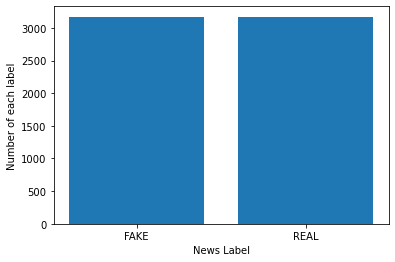

In [7]:
#Visualizing the number of fake and real news in the data
plt.bar(label_count.index.values, label_count['text'])
plt.xlabel('News Label')
plt.ylabel('Number of each label')
plt.show()

In [8]:
#Extracting the input and label from the data
text=news.text
label=news.label
text.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

# Cleaning the text

The input data(text) has different letter cases and it contains stopwords, puntuation, unicode characters,urls,mentions,etc. The text will be cleaned to normalise the case and remove stopwords, unicode, urls, punctuation, mentions, etc.

In [9]:
import re
import nltk
import string
from nltk.corpus import stopwords

In [10]:
#In case of any missing corpus, download all-nltk
#nltk.download()

In [11]:
#Defining a function to clean the text data
def text_preproc(x):
  x = x.lower() #Transforming all the text to lower cases
  x = x.encode('ascii', 'ignore').decode() #Removing unicode characters in the text
  x = re.sub(r'https*\S+', ' ', x) #Removing URLs
  x = re.sub(r'@\S+', ' ', x) #Removing mentions
  x = re.sub(r'#\S+', ' ', x) #Removing hastags
  x = re.sub(r'\'\w+', '', x) #Removing ticks and the next character
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x) #Removing puntuations
  x = re.sub(r'\w*\d+\w*', '', x) #Removing numbers
  x = re.sub(r'\s{2,}', ' ', x) #Replacing over spaces with single spacing
  return x
text = news.text.apply(text_preproc)

In [12]:
text

0       daniel greenfield a shillman journalism fellow...
1       google pinterest digg linkedin reddit stumbleu...
2       u s secretary of state john f kerry said monda...
3        kaydee king november the lesson from tonight ...
4       it primary day in new york and front runners h...
                              ...                        
6330    the state department told the republican natio...
6331    the p in pbs should stand for plutocratic or p...
6332     anti trump protesters are tools of the oligar...
6333    addis ababa ethiopia president obama convened ...
6334    jeb bush is suddenly attacking trump here why ...
Name: text, Length: 6335, dtype: object

# Training and classifying the data

In [13]:
#Splitting the data into training and testing set
import itertools
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(text,label,test_size=0.2,random_state=10)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Initializing a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set,and then transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [15]:
tfidf_train

<5068x65585 sparse matrix of type '<class 'numpy.float64'>'
	with 1311234 stored elements in Compressed Sparse Row format>

In [16]:
tfidf_test

<1267x65585 sparse matrix of type '<class 'numpy.float64'>'
	with 319808 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
#Initializing a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [18]:
#Predicting on the test set
y_pred=pac.predict(tfidf_test)
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype='<U4')

# Checking the accuracy of the model

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
#calculating the accuracy of the model
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.79%


In [20]:
#Building confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[574,  29],
       [ 37, 627]], dtype=int64)